# Training the Soft-Actor-Critic agent on the pendulum

In [1]:
from SAC.Normal_Policy import Normal_Policy
from SAC.Value_function import Value_function
from SAC.SoftActorCritc import SoftActorCritic
import time
import gym
import numpy as np

Change action ranges to -1 to 1, as used in my implementation of SAC.

In [2]:
class NormalizedActions(gym.ActionWrapper):
    def action(self, action):
        low  = self.action_space.low
        high = self.action_space.high
        
        action = low + (action + 1.0) * 0.5 * (high - low)
        action = np.clip(action, low, high)
        
        return action

    def reverse_action(self, action):
        low  = self.action_space.low
        high = self.action_space.high
        
        action = 2 * (action - low) / (high - low) - 1
        action = np.clip(action, low, high)
        
        return actions
  
        

In [3]:
env = NormalizedActions(gym.make("Pendulum-v0"))
#env = gym.make("LunarLanderContinuous-v2")
ac_space = env.action_space
o_space = env.observation_space
print(ac_space.high)
print(o_space)
print(zip(env.observation_space.low, env.observation_space.high))

[2.]
Box(3,)


c:\users\maximilian\appdata\local\programs\python\python36\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Defining the algorithm specifications.

In [4]:
q_fct_config = {"hidden_layers": [256, 256]}
v_fct_config = {"hidden_layers": [256, 256]}
pi_fct_config = {"hidden_layers": [100, 100]}

SAC_agent = SoftActorCritic(o_space=o_space, 
                            a_space=ac_space, 
                            value_fct=Value_function, 
                            policy_fct=Normal_Policy, 
                            env= env,
                            discount=  0.99, 
                            tau = 0.01, 
                            batch_size=256, 
                            alpha = 0.1,
                            lambda_V = 3e-4, 
                            lambda_Pi = 3e-4, 
                            lambda_Q = 3e-4,
                            dim_act = 1,
                            dim_obs = 3,
                            buffer_size = int(1e4),
                            q_fct_config=q_fct_config,
                            v_fct_config=v_fct_config,
                            pi_fct_config=pi_fct_config)

Training the SAC algorithm takes about 25 episodes to reach a good level.

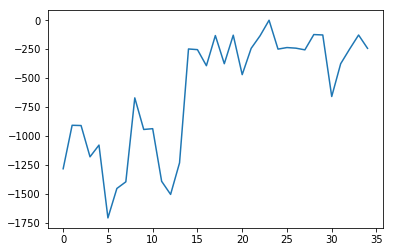

 34% (34 of 100) |#######                | Elapsed Time: 0:02:21 ETA:   0:04:11

KeyboardInterrupt: 

In [5]:
r= SAC_agent.train(iter_fit=100, max_steps = 500, env_steps = 1, grad_steps = 1, burn_in =1000)

In [10]:
total_rew = 0

ob = env.reset()
for i in range(500):
    a = SAC_agent.act_greedy(np.asarray(ob).reshape(1, SAC_agent._o_space.shape[0]))
    a = a[0]
    ob,reward, done, info = env.step(a)
    time.sleep(1.0/100)
    env.render(mode='human')
    total_rew += reward
    if done: break
env.close()
print(total_rew)

-244.4707495349824
